In [1]:
from os import listdir
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from pylab import rcParams

# Raw data

In [6]:
raw_file='training/training_setA/p000001.psv'
df=pd.read_csv(raw_file,delimiter='|')
df.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,1,0
1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,2,0
2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,3,0
3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,NaN,24.0,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,4,0
4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,NaN,NaN,NaN,...,NaN,NaN,NaN,83.14,0,NaN,NaN,-0.03,5,0


# Processed data

### Time series data

In [11]:
df = pd.read_csv('processed_data/training_setA/p000001.csv')
df.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets
0,97.0,95.0,36.11,98.0,75.330,80,19.0,38,24.000000,45.0,...,3.3,3.8,0.3,0,37.2,12.5,15,5.7,300,317.0
1,97.0,95.0,36.11,98.0,75.330,80,19.0,38,24.000000,45.0,...,3.3,3.8,0.3,0,37.2,12.5,15,5.7,300,317.0
2,89.0,99.0,36.11,122.0,86.000,80,22.0,38,24.000000,45.0,...,3.3,3.8,0.3,0,37.2,12.5,15,5.7,300,317.0
3,90.0,95.0,36.11,122.0,88.665,80,30.0,38,24.000000,45.0,...,3.3,3.8,0.3,0,37.2,12.5,15,5.7,300,317.0
4,103.0,88.5,36.11,122.0,91.330,80,24.5,38,23.857143,45.0,...,3.3,3.8,0.3,0,37.2,12.5,15,5.7,300,317.0


### Data info

In [17]:
dfA = pd.read_csv('processed_data/training_setA/file_info.csv')

dfB = pd.read_csv('processed_data/training_setB/file_info.csv')
dfA.head()

,FileName,TypeSepsis,Sex,Age,Length,LenTime
0,p000001.csv,0,0,82.14,54,258.0
1,p000002.csv,0,0,74.91,23,258.0
2,p000003.csv,0,0,44.82,48,258.0
3,p000004.csv,0,0,64.71,29,258.0
4,p000005.csv,0,1,27.09,48,258.0


### Number of patients

In [18]:
len(dfA)+len(dfB)

40336

### Total number of sepsis patients

In [24]:
np.array(dfA.groupby(['TypeSepsis'])['TypeSepsis'].sum())[1]+np.array(dfB.groupby(['TypeSepsis'])['TypeSepsis'].sum())[1]

2932

### Number of hours a patient spends in Hospital

/Users/sunchenxi/opt/anaconda3/envs/DL/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


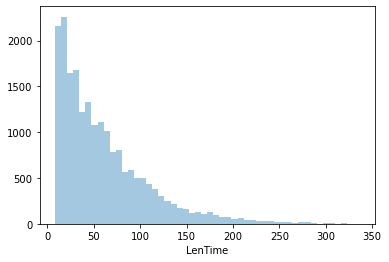

In [40]:
dfA['LenTime']=dfA['LenTime'].astype(int)
sns.distplot(dfA['LenTime'], kde=False);

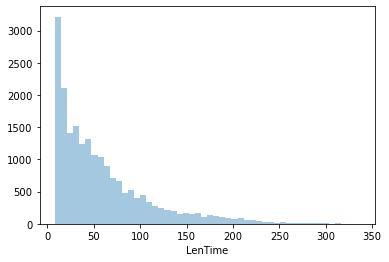

In [41]:
dfB['LenTime']=dfB['LenTime'].astype(int)
sns.distplot(dfB['LenTime'], kde=False);

### Remove patients with more than 100 hours 

/Users/sunchenxi/opt/anaconda3/envs/DL/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


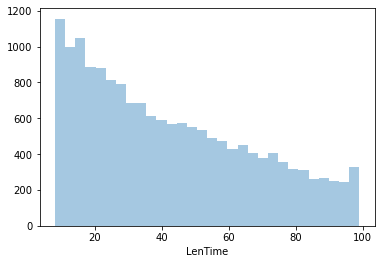

In [46]:
new_dfA=dfA[dfA['LenTime']< 100]
new_dfB=dfB[dfA['LenTime']< 100]
sns.distplot(new_dfA['LenTime'], kde=False);

### Total number of patients with time <=100

In [47]:
len(new_dfA)+len(new_dfB)

33352

### Total number of sepsis patients with time <=100

In [48]:
np.array(new_dfA.groupby(['TypeSepsis'])['TypeSepsis'].sum())[1]+np.array(new_dfA.groupby(['TypeSepsis'])['TypeSepsis'].sum())[1]

2898

After removing patients with more than 60 hours , we see that loose a considerable amount of patients from the positive class. Hence they are not being removed for the moment

### Time at which a patient contracts Sepsis

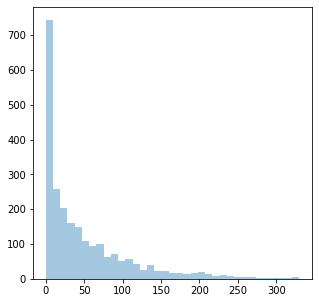

In [85]:
temp = train.groupby(['Patient_id'])['SepsisLabel'].sum().reset_index()
sepsis_train_pid = np.array(temp[temp['SepsisLabel'] > 0]['Patient_id'])
temp = train[train['Patient_id'].isin(sepsis_train_pid)]
sepsis_time = []
tot_time = []
for pid in sepsis_train_pid:
    df = temp[temp['Patient_id']==pid]
    sepsis_time.append(df[df['SepsisLabel']==1]['time'].iloc[0])
    tot_time.append(df[df['SepsisLabel']==1]['time'][::-1].iloc[0])
rcParams['figure.figsize'] = 5, 5
sns.distplot(sepsis_time, kde=False);